Tutorials:
- https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d
- https://iexcloud.io/
- https://pypi.org/project/iexfinance/

# 1. MCMC

https://iexcloud.io/

- create account, define environmental varirable

In [58]:
# Financial modules
from iexfinance.stocks import Stock, get_historical_data

# General python modules
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
end = datetime.date.today()
start = end - datetime.timedelta(days=90)

In [47]:
df = get_historical_data('tsla',start, end, close_only=True)

In [48]:
df = pd.DataFrame(df).T

In [161]:
df['perc_change'] = df.close / df.close.shift(1)

In [164]:
df.head()

,close,volume,perc_change
2019-07-09,230.06,6190835.0,NaN
2019-07-10,238.92,9145736.0,1.038512
2019-07-11,238.60,7514430.0,0.998661
2019-07-12,245.08,9200521.0,1.027158
2019-07-15,253.50,11000092.0,1.034356


In [49]:
print(df.shape)
print(df.columns)

(63, 2)
Index(['close', 'volume'], dtype='object')


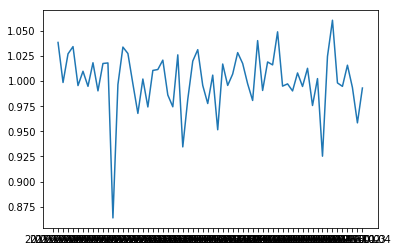

In [165]:
plt.plot(df.index, df.perc_change)
plt.show()

In [166]:
std = df.perc_change.std()

In [57]:
last = df.close[-1]

In [171]:
def mcmc(last,std,periods):
    
    # assumptions: normal, constant percentual short term variance and no trend
    
    space = [last]
    
    for period in range(periods):
        next_space = space[-1]*(1+np.random.normal(0,std,1))[0]
        
        if next_space < 0.01:
            space.append(0.01)
        else:
            space.append(next_space)
    
    return space[1:]